# **附录6：关于隐藏马尔科夫模型（Hidden Markov Model, HMM)**

以下内容参考苏黎世大学 ***[计算机科学的形式方法（Formal Methods for Computer Science II）](https://www.ifi.uzh.ch/en/ailab/teaching/formalmethods2013.html)*** 第四章 **[马尔科夫过程（Markov Processes）](https://www.ifi.uzh.ch/dam/jcr:00000000-2826-155d-ffff-ffff86200612/f-chapter4.pdf)** ❤️

&emsp;

***如果一个系统具有马尔科夫特性，那么它就没有记忆***

&emsp;

## **马尔科夫过程（Markov Processes）**

### **以小仓鼠的生活做例子：**

一只生活在笼子里的小仓鼠，它只有三种生活 **状态**：1）睡觉，2）吃东西，3）蹬轮子锻炼。每过 1 分钟，它在做的事都有可能发生变化，或者继续做当前的事，或者去做别的，整个过程 **不存在所谓记忆**。根据观察，大致有这样的规律：

+ 睡觉的时候，90% 的可能性是在下一分钟继续睡觉，不会醒来

+ 如果它醒了，50% 的可能是去吃东西，50% 的可能去锻炼

+ 它吃饭只用 1 分钟，接下来一定会去做别的

+ 吃过饭后，30% 的可能去蹬轮子，70% 的可能回去睡觉

+ 锻炼结束后，80% 的可能要回去睡觉休息，20% 的可能是继续蹬轮子

以上 5 条关于小仓鼠三种生活状态相互切换的规律可以用下图精炼地表示出来：

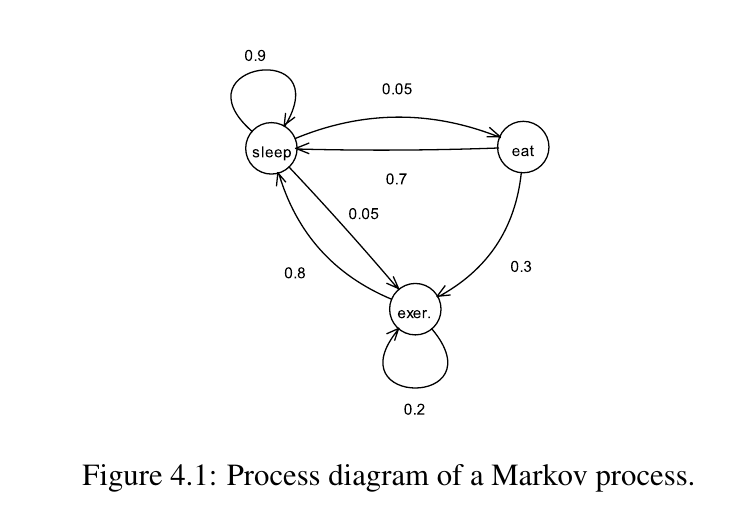

### **形式定义**

***马尔科夫链（Markov Chain）*** 就是由具有 *马尔科夫特性* 的随机变量 $\mathbf{X}_1$、$\mathbf{X}_2$、$\mathbf{X}_3$、... $\mathbf{X}_n$ 等组成的一个序列，所谓马尔科夫特性是指任一给定状态 $\mathbf{X}_n$ 发生的概率只依赖相邻的前一个状态 $\mathbf{X}_{n-1}$。这句话用形式化的数学公式表示如下：

$$\mathbf{P}(\mathbf{X}_n = x | \mathbf{X}_{n-1} = x_{n-1}, ..., \mathbf{X}_1 = x_1) = \mathbf{P}(\mathbf{X}_n = x | \mathbf{X}_{n-1} = x_{n-1})$$

变量 $\mathbf{X}_n$ 有可能取到的所有值共同组成一个可数的集合 $\mathbf{S}$，称为该马尔科夫链的 ***状态空间（state space）***。如果这个状态空间是有限的，而且马尔科夫链也是时间同质的（就是状态转移概率随时间流逝恒定不变），那么状态转移的概率分布可以用一个矩阵来表征，即 $\mathbf{P} = {(p_{ij})}_{{i,j}\in S}$，这个矩阵相应被称作 **转移矩阵（transition matrix）**，它的元素这样定义：

$$p_{ij} = P(X_n = j | X_{n-1} = i)$$


令 ${\mathbf{x}}^{(n)}$ 表示时间点 $n$ 时的概率分布，即向量的第 i 个元素描述的是系统在时间点 n 时处于状态 i 的概率：

$$\mathbf{x}_i^{(n)} = P(X_n = i)$$

由此可以计算转移概率：

$$\mathbf{x}^{(n+1)} = \mathbf{P} \centerdot \mathbf{x}^{(n)}$$
$$\mathbf{x}^{(n+2)} = \mathbf{P} \centerdot \mathbf{x}^{(n+1)} = \mathbf{P}^2 \centerdot \mathbf{x}^{(n)}$$
$$\mathbf{x}^{n} = \mathbf{P}^n \centerdot \mathbf{x}^{(0)}$$

### **回到小仓鼠的例子**

现在将刚学到的 ***马尔科夫过程*** 当作一种数学式分析工具再来看看小仓鼠的生活


***状态空间（state space）*** 是由三个元素组成的一个集合：

$$\mathbf{S} = \{睡觉,吃饭,蹬轮子\}$$


***转移矩阵*** (就是状态间相互转换的概率，从前面的画图表示到下面的数学矩阵表示）：

$$\mathbf{P} = \left( \begin{array}{ccc} 0.9 & 0.7 & 0.8 \\ 0.05 & 0 & 0 \\ 0.05 & 0.3 & 0.2 \end{array} \right)$$

从上一部分的推导得知，转移矩阵可以用来预测在某个时间点（n）上，小仓鼠处于某种生活状态 $\mathbf{x}^{(n)}$ 的概率分布，假设最开始的时候小仓鼠在睡觉，那么：

$$\mathbf{x}^{(0)} = \left( \begin{array}{c} 1 \\ 0 \\ 0 \\ \end{array} \right)$$

1 分钟之后,它处于某种生活状态的概率分布就发生了变化：

$$\mathbf{x}^{(1)} = \mathbf{P} \centerdot \mathbf{x}^{(0)} = \left( \begin{array}{c} 0.9 \\ 0.05 \\ 0.05 \\ \end{array} \right)$$

前面例子部分已提及从对它的观察总结出的规律，当小仓鼠在睡觉的时候，下一分钟有 90% 的可能仍然还是睡觉，但也有极小的可能醒来，或者去吃饭（5%的可能），或者去锻炼（也是 5% 的可能），转移矩阵就是用非常精简、数学的方式描述这些规律。

同理，2 分钟之后小仓鼠生活状态的概率分布又变成这样：

$$\mathbf{x}^{(2)} = \mathbf{P} \centerdot \mathbf{x}^{(1)} = \left( \begin{array}{c} 0.885 \\ 0.045 \\ 0.07 \\ \end{array} \right)$$

重回下面这张图，可以称呼它为过程图（process diagram），用来描述马尔科夫过程，每一个节点（node）代表状态空间集合中的一种状态（state），节点间的连线（edge）上有标注状态转换的概率，注意连线是有方向性的：

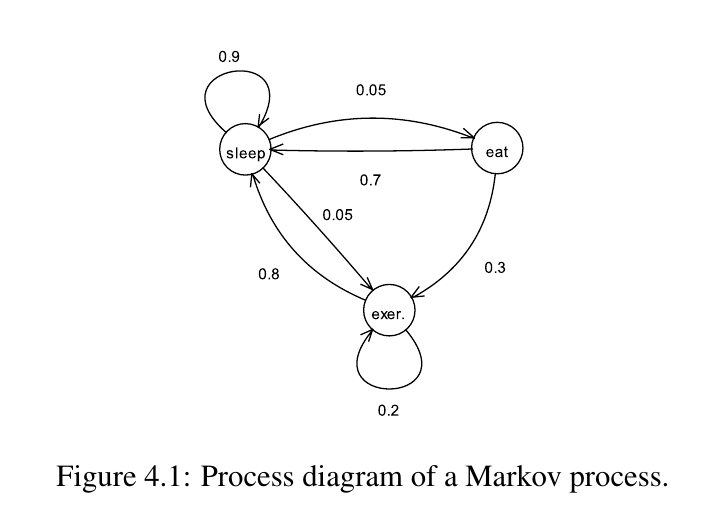

&emsp;

### **平稳分布（Stationary Distribution）**

在绝大多数实际案例中，经过一段时间，初始状态的概率分布情况即 $\mathbf{x}^{(0)}$ 对后来状态的概率分布的影响就非常小了，甚至可以约等于无。也就是说，如果一个马尔科夫过程是非周期性（aperiodic）且不可约的（irreducible），那状态的概率分布最终会趋向收敛于一个值，即为平稳分布：

$$\mathbf{x}^* = \lim_{n \to \infty} \mathbf{x}^{(n)}$$

所谓不可约性是指状态空间内的所有状态是互通的，能相互抵达。

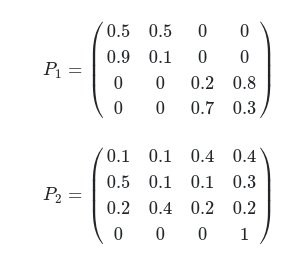

如上图所示，这两个转移矩阵都 *不满足不可约性*，P1 中从状态 1、2 无法抵达状态 3 、4，反之亦然；P2 中则是状态 1、2、3 无法抵达状态 4，反之也是。（参考 [How do you see a Markov chain is irreducible?](https://stats.stackexchange.com/questions/186033/how-do-you-see-a-markov-chain-is-irreducible))



平稳分布 $\mathbf{x}^*$ 由此满足下面这个等式：

$$\mathbf{x}^* = \mathbf{P}\centerdot\mathbf{x}^*$$

也就是说，转移矩阵不再能影响它。根据这个等式，利用小仓鼠生活状态的转移矩阵已知、以及 3 种状态合起来的概率值为 1 这两个条件，可以计算出当我们长时间观察小仓鼠的生活时，89% 的可能它都在睡觉，4% 的可能在吃东西，剩下 7% 的可能是在运动。

&emsp;

## **隐藏马尔科夫模型（Hidden Markov Model, HMM）**

隐藏马尔科夫模型是一种统计模型，用来对含有未知参数的马尔科夫过程建模，挑战在于从外部观察到的参数值推论隐藏参数（hidden parameters）。典型地，模型参数通常已知，问题是要找到什么样的隐藏状态序列有最大可能生成给定的外部可见状态序列。回到前面小仓鼠的例子，它的三种生活状态（睡觉、吃饭、蹬轮子）是完全外部可见、已知的，唯一的参数就是状态转移的概率分布；但是在隐藏马尔科夫模型中，状态具体有哪些或是以怎样的顺序生成外部观测的事件序列并不清楚，处于黑箱中，观察者在黑箱外只能通过外在表现或输出去推测。每一种隐藏状态都有一个概率分布，叫作 ***生成概率（emission probability）***

下面这张图示意的就是隐藏马尔科夫模型：

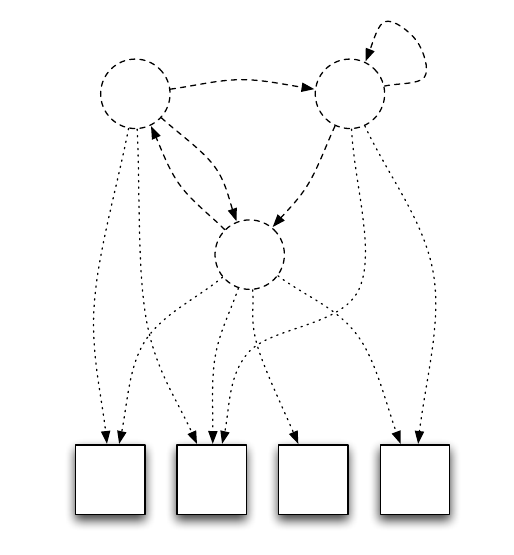

上面虚线圆圈部分类似前面看过的过程图，表示隐藏的马尔科夫过程，下面实线方框表示外部可见的输出值，虚线箭头表示生成概率。

&emsp;

### **以天气如何影响朋友的生活为例子**

假设有一个朋友，我们每天都会给她打电话谈论她今天做的事，这些事只会有三种可能：在公园散步、购物以及打扫房间，而每天具体做哪个则完全由当天的天气决定。她那边的天气只有两种状态，晴天或雨天，每天究竟是哪种我们并不知道，只是对她那边的天气变化趋势有大致了解。我们接下来要做的就是根据她做的事，推断她那边的天气，因为前面说了，她做什么完全由当天的天气决定，而我们使用的分析工具就是隐藏马尔科夫模型。

在这个例子中，朋友那边的天气——晴天或雨天——就是不可见的隐藏状态，她有可能做的三件事——走路、购物和清洁——就是外部观测输出。此外，我们还知道：

+ 天气整体变化趋势

    + 如果当天下雨，第二天有 70% 的可能继续下雨
    
    + 如果当天晴天，第二天则有 40% 的可能下雨
    
+ 朋友的行为模式

    + 如果是雨天，她有 50% 的可能居家清洁，40% 的可能去购物，仅 10% 的可能外出走路
    
    + 如果是晴天，她有 60% 的可能散步，30%的可能去购物，10% 的可能呆在家里清洁
    


&emsp;

由此我们得到：

隐藏状态空间（hidden state space）：

$$ S = \{ 晴天, 雨天 \}$$

输出状态空间（output state space）：

$$ O = \{走路,购物,清洁\}$$

隐藏状态的转移矩阵：

$$\mathbf{P} = \left(\begin{array}{cc} 0.7 & 0.4 \\ 0.3 & 0.6 \end{array} \right)$$

隐藏状态的生成概率：

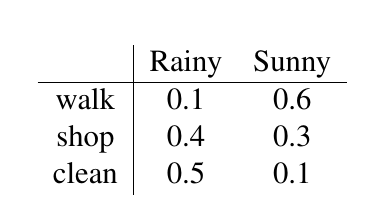

整个模型可用下图表示：

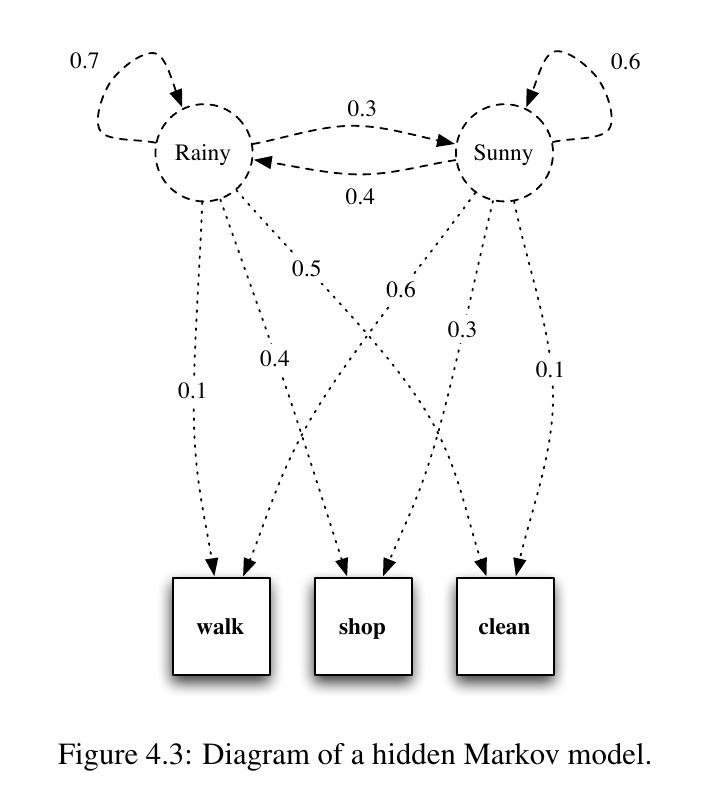

如果接连三天，朋友先是去散步，第二天购物，第三天清洁，那么我们要如何回答下面这个问题：

**这三天的天气状态最有可能是怎样一个序列才会使朋友依次分别做了这些事？**

还记得前面定义马尔科夫过程时有用到 *马尔科夫特性* 这个概念吗，就是说某个时间点上状态的概率分布只受相邻的前一个时间点上的状态的影响，利用这个特性，下面这个算法能帮我们快速回答上面这个问题。

&emsp;

### **Viterbi 算法**

就是为每个输出状态以及可能的隐藏状态分别追踪计算 *相对概率（relative probability）* 以及最大可能的隐藏状态序列，结合前面的例子，下面这些图片展示了如何一步步分析计算：

+ 初始化，隐藏状态晴天或雨天的概率均等，隐藏状态序列此时为空：

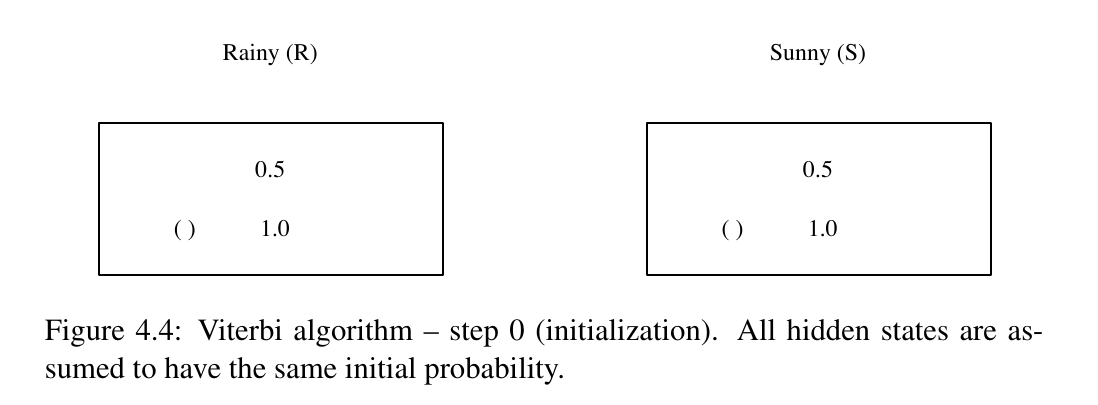

+ 第一天（朋友去散步了），隐藏状态的转移概率和生成概率都会用于计算更新隐藏状态的概率分布（即方框内中间上方那一行数值），下面是可能序列的概率值，数值更高（即可能性更大的）的那个会被用到下一步的计算中

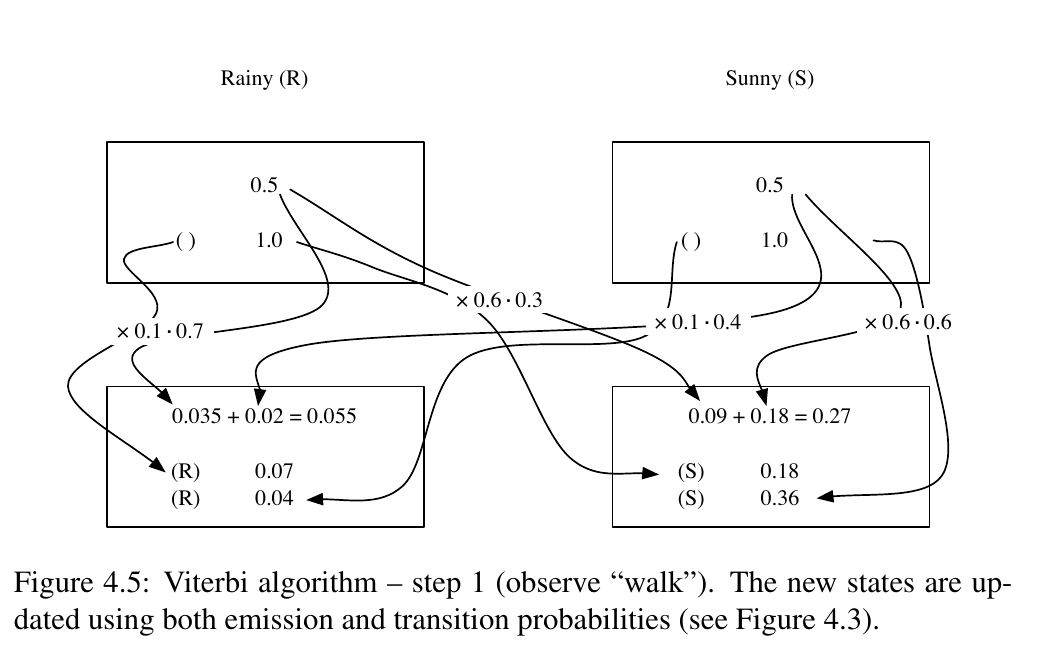

+ 第二天（朋友去购物了），从下图中可以清楚看出，上一步中可能序列的概率值小的那个在这一步计算中都被抛弃了

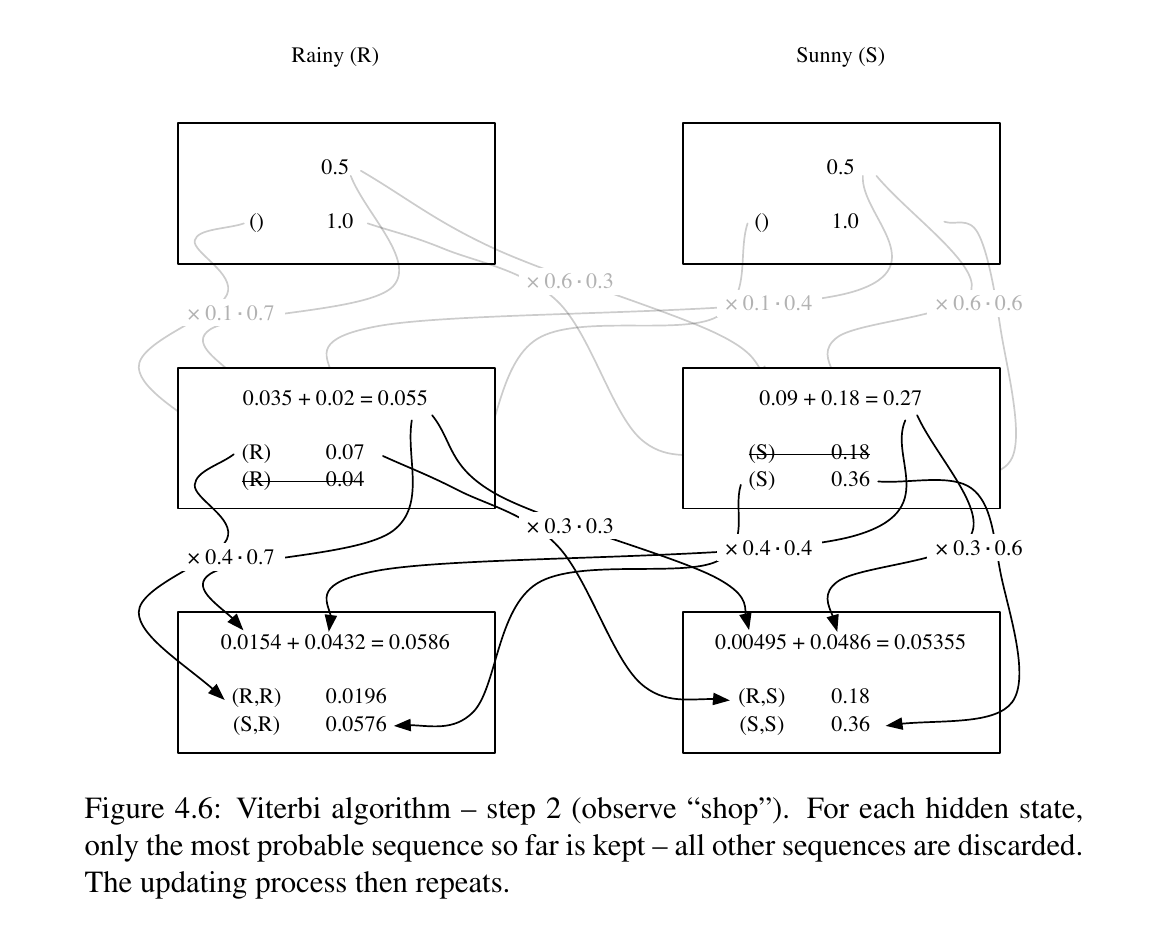

+ 第三天（朋友在家清洁），只看这一天，雨天的概率值要大于晴天的概率值，而可能性最大的隐藏状态序列是 {S，R，R}，即 {晴天、雨天、雨天}

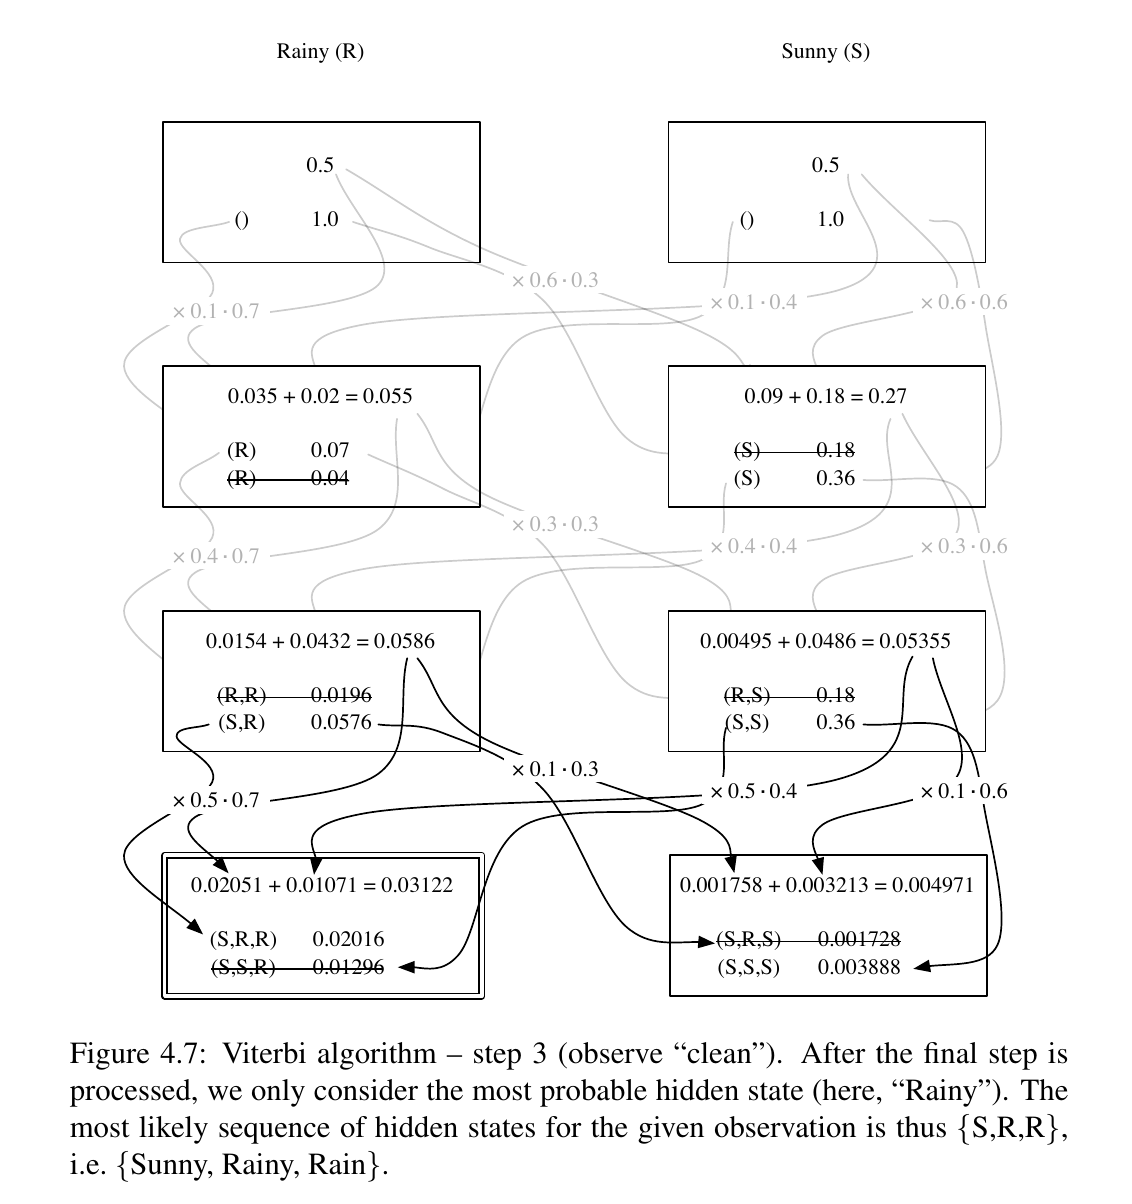

### **Viterbi 算法的复杂度（complexity）**

Viterbi 的计算复杂度为 $\mathcal{O}(M^2 \centerdot N)$，M = |S| 表示隐藏状态的数量，N 表示观察到的输出的数量